In [32]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [33]:
df['continent'].fillna('AA',inplace=True)

C:\Users\KOREAVC\AppData\Local\Temp\ipykernel_20644\3382694571.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['continent'].fillna('AA',inplace=True)


In [34]:
# 대륙간 국가 개수
df.groupby('continent').count()
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
AA    23
OC    16
SA    12
Name: count, dtype: int64

In [35]:
# 대륙간 맥주 소비량
df.groupby('continent')['beer_servings'].sum()

continent
AA    3345
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [36]:
# 아프리카(AF)의 맥주 소비량 합계
df.groupby('continent')['beer_servings'].sum().loc['AF']

3258

In [37]:
df[df['continent']=='AF']['beer_servings'].sum()

3258

In [38]:
# 대륙별 평균 wine 출력
df.groupby('continent')['wine_servings'].mean()

continent
AA     24.521739
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [39]:
# 상관관계 함수

df[['beer_servings','wine_servings']].corr(method='pearson')



,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [40]:
cols = ['beer_servings','spirit_serving','wine_serving','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

KeyError: "['spirit_serving', 'wine_serving'] not in index"

In [ ]:
## 대륙별 맥주소비량, 평균, 최소, 최대, 합계
df.groupby('continent')['beer_servings'].agg(['sum','mean','min','max'])

# 맥주 소비량이 가장 높은 대륙은?
x=df.groupby('continent')['beer_servings'].sum().sort_values().index
y=df.groupby('continent')['beer_servings'].sum().sort_values().values
x
y

# 막대그래프 대륙별 맥주소비량 그래프로 구현하시오.

array([1435, 1630, 2101, 3258, 8720], dtype=int64)

<BarContainer object of 5 artists>

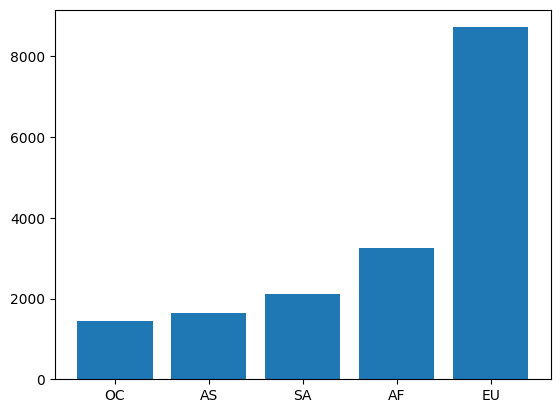

In [ ]:
import matplotlib.pyplot as plt

plt.bar(x,y)

In [51]:
# AF, EU 맥주 소비량 차이
a = df.groupby('continent')['beer_servings'].sum().loc['AF']
b = df.groupby('continent')['beer_servings'].sum().loc['EU']
b-a



5462

In [54]:
# 컬럼의 모든 술의 총량을 출력하시오.
df['total_servings'] = df['beer_servings']+df['wine_servings']+df['spirit_servings']
df
df['total_servings'].sum()

45665

In [57]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


<BarContainer object of 20 artists>

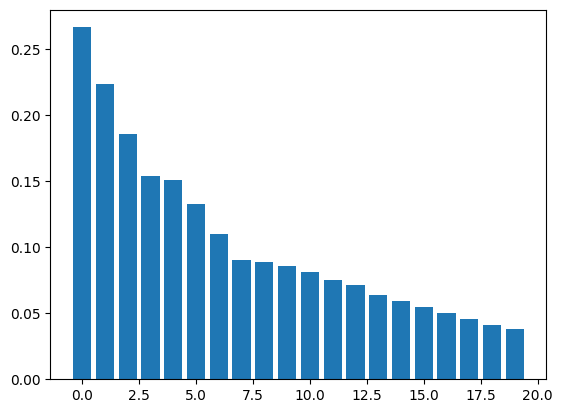

In [91]:
# 술 소비량 대비 알콜 비율이 어느정도 양이 되는 지 출력하시오.
df['alcohol_rate'] = df['total_litres_of_pure_alcohol']/df['total_servings']
# df['alcohol_rate'].fillna('0',inplace=True)

x = df.sort_values('alcohol_rate',ascending=False).head(20)['country']
x = [i for i in range(len(x))]
y = df.sort_values('alcohol_rate',ascending=False).head(20)['alcohol_rate']
plt.bar(x,y)


In [82]:

# for i in rang
list(x)
x

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]